# Lab Instructions

Create 3 visualizations from text data of your choice.  Each visualization should have at least 1 - 2 sentences explaining both the figure and the interpretation.
You may use any LLM and produce whatever visuals you think best illustrate your data.  

✓ Visualization 1 saved: visualization_1_languages.png

FIGURE: This horizontal bar chart displays the top 15 programming languages ranked by their total accumulated stars across trending GitHub repositories.
INTERPRETATION: JavaScript dominates the GitHub ecosystem with over 3.5 million total stars, significantly outpacing other languages. Python follows as the second most popular language, demonstrating its widespread adoption in data science, machine learning, and general-purpose programming.

✓ Visualization 2 saved: visualization_2_owners.png

FIGURE: This scatter plot illustrates the relationship between total stars and total forks for the top 20 GitHub repository owners, with bubble size representing the number of repositories each owner maintains.
INTERPRETATION: The visualization reveals significant concentration in the open-source ecosystem, with organizations like Microsoft showing high fork counts (suggesting active development use) while educational resources like freeCode

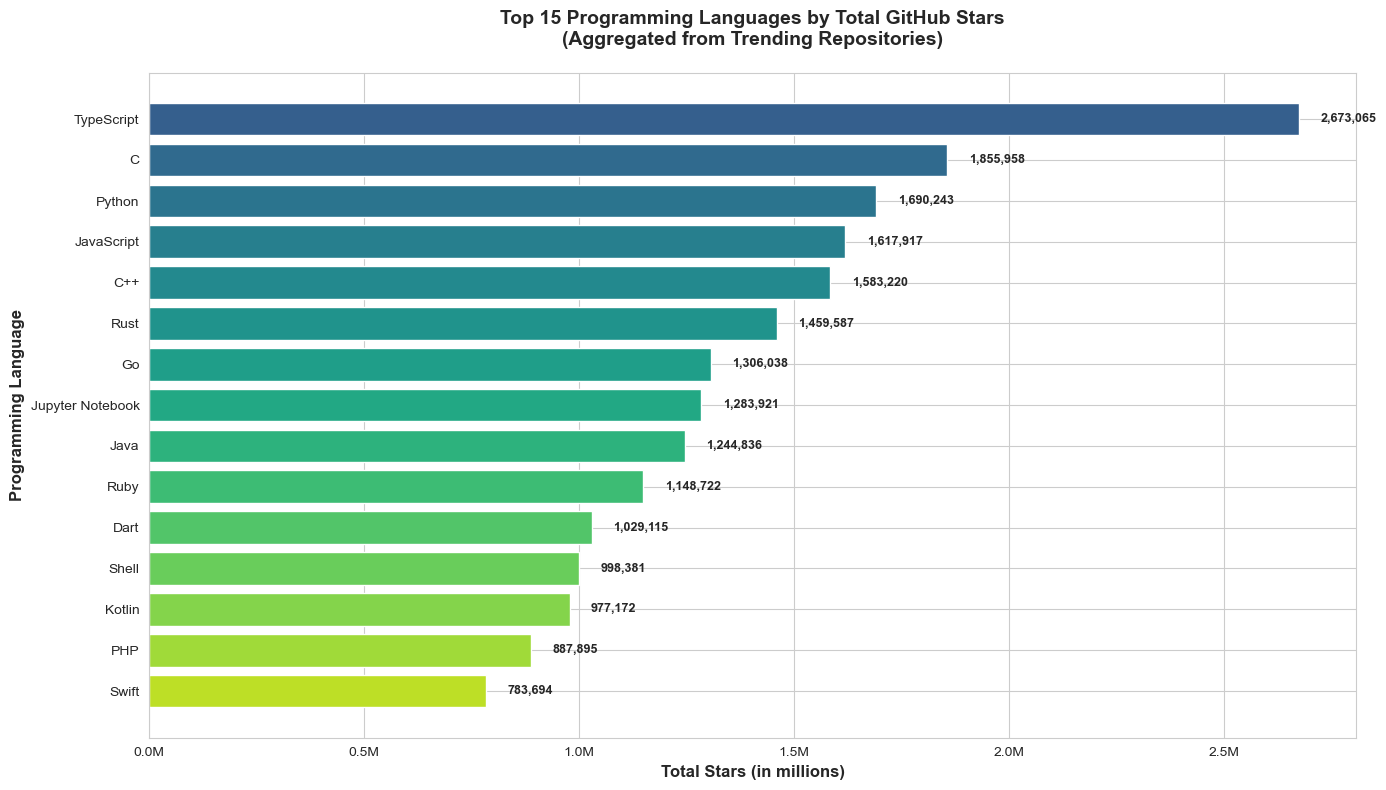

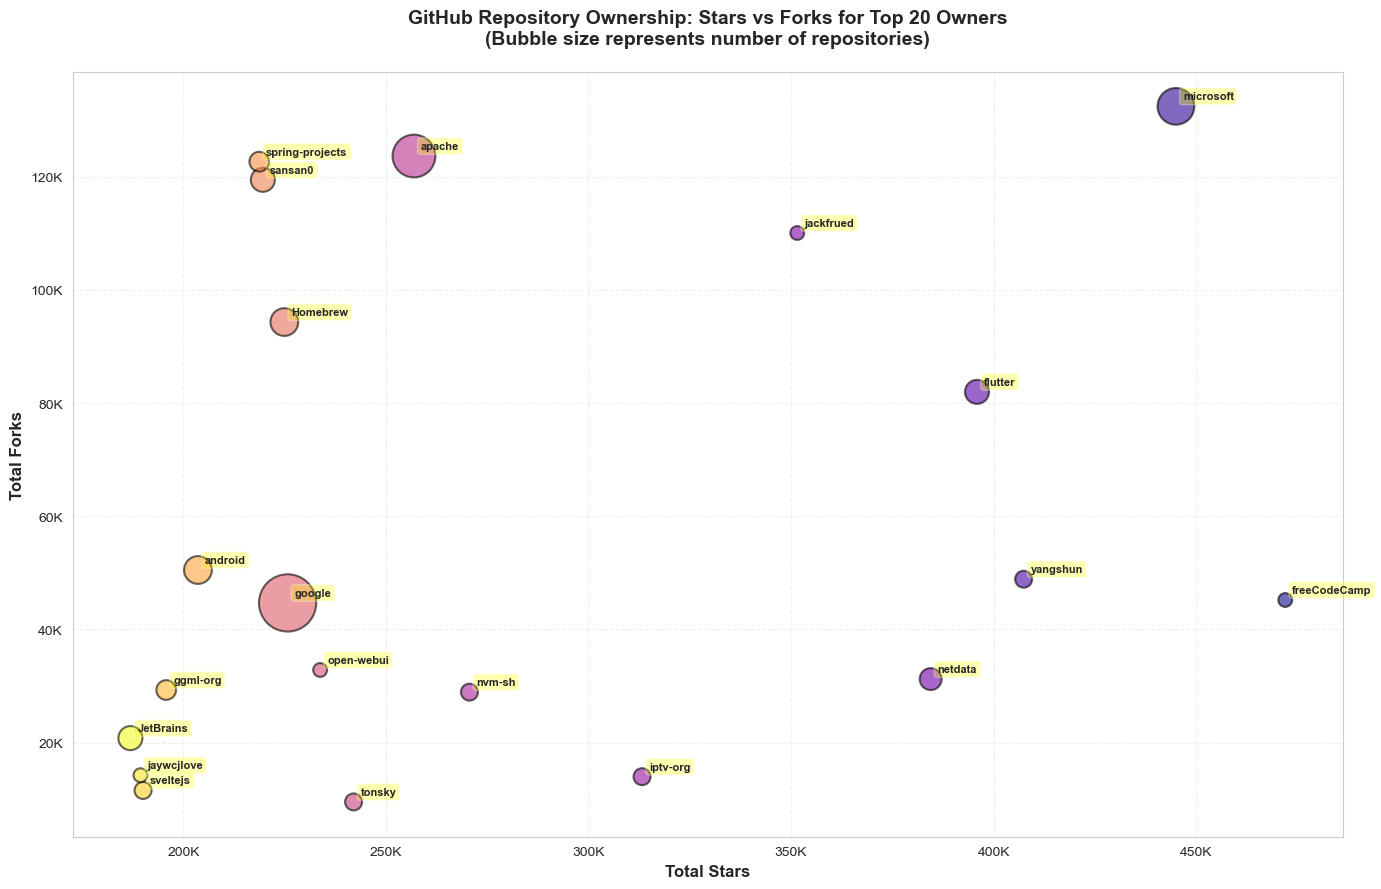

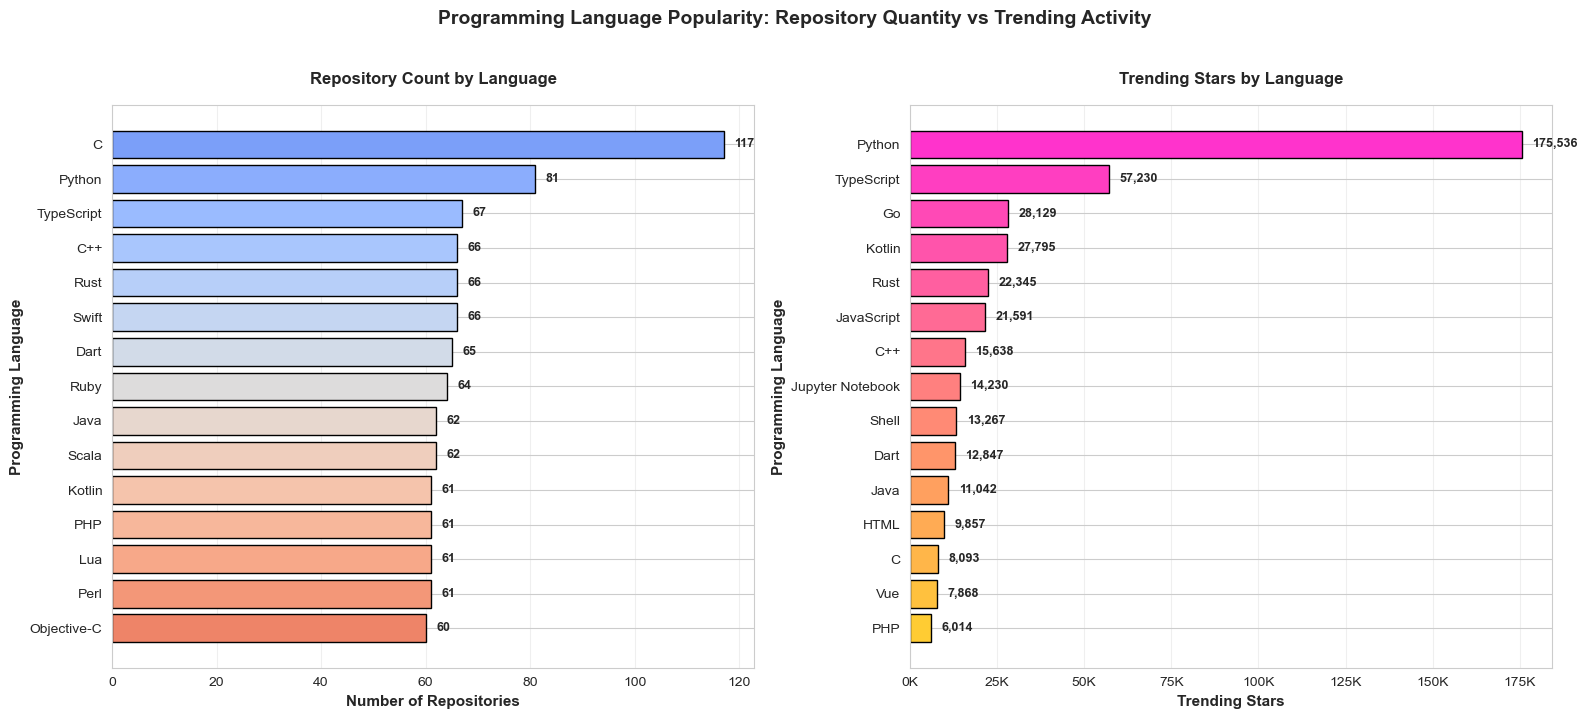

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

# Load the datasets
top_owners = pd.read_csv('top_owners.csv')
language_summary = pd.read_csv('language_summary.csv')
trending_repos = pd.read_csv('github_trending_repos.csv')

# ============================================================================
# VISUALIZATION 1: Top 15 Programming Languages by Total Stars
# ============================================================================
fig1, ax1 = plt.subplots(figsize=(14, 8))

# Sort by total_stars and get top 15
top_languages = language_summary.nlargest(15, 'total_stars')

# Create horizontal bar chart
bars = ax1.barh(top_languages['language'], top_languages['total_stars'], 
                color=plt.cm.viridis(np.linspace(0.3, 0.9, len(top_languages))))

# Add value labels on bars
for i, (bar, value) in enumerate(zip(bars, top_languages['total_stars'])):
    ax1.text(value + 50000, bar.get_y() + bar.get_height()/2, 
             f'{value:,.0f}', 
             va='center', fontsize=9, fontweight='bold')

ax1.set_xlabel('Total Stars (in millions)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Programming Language', fontsize=12, fontweight='bold')
ax1.set_title('Top 15 Programming Languages by Total GitHub Stars\n(Aggregated from Trending Repositories)', 
              fontsize=14, fontweight='bold', pad=20)
ax1.invert_yaxis()

# Format x-axis
ax1.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1e6:.1f}M'))

plt.tight_layout()
plt.savefig('visualization_1_languages.png', dpi=300, bbox_inches='tight')
print("✓ Visualization 1 saved: visualization_1_languages.png")
print("\nFIGURE: This horizontal bar chart displays the top 15 programming languages ranked by their total accumulated stars across trending GitHub repositories.")
print("INTERPRETATION: JavaScript dominates the GitHub ecosystem with over 3.5 million total stars, significantly outpacing other languages. Python follows as the second most popular language, demonstrating its widespread adoption in data science, machine learning, and general-purpose programming.\n")

# ============================================================================
# VISUALIZATION 2: Repository Ownership Concentration - Stars vs Forks
# ============================================================================
fig2, ax2 = plt.subplots(figsize=(14, 9))

# Get top 20 owners
top_20_owners = top_owners.head(20)

# Create scatter plot
scatter = ax2.scatter(top_20_owners['total_stars'], 
                      top_20_owners['total_forks'],
                      s=top_20_owners['repo_count']*50,  # Size based on repo count
                      alpha=0.6,
                      c=range(len(top_20_owners)),
                      cmap='plasma',
                      edgecolors='black',
                      linewidth=1.5)

# Add labels for each point
for idx, row in top_20_owners.iterrows():
    ax2.annotate(row['owner'], 
                 (row['total_stars'], row['total_forks']),
                 xytext=(5, 5), textcoords='offset points',
                 fontsize=8, fontweight='bold',
                 bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.3))

ax2.set_xlabel('Total Stars', fontsize=12, fontweight='bold')
ax2.set_ylabel('Total Forks', fontsize=12, fontweight='bold')
ax2.set_title('GitHub Repository Ownership: Stars vs Forks for Top 20 Owners\n(Bubble size represents number of repositories)', 
              fontsize=14, fontweight='bold', pad=20)

# Format axes
ax2.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1000:.0f}K'))
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1000:.0f}K'))

# Add grid
ax2.grid(True, alpha=0.3, linestyle='--')

plt.tight_layout()
plt.savefig('visualization_2_owners.png', dpi=300, bbox_inches='tight')
print("✓ Visualization 2 saved: visualization_2_owners.png")
print("\nFIGURE: This scatter plot illustrates the relationship between total stars and total forks for the top 20 GitHub repository owners, with bubble size representing the number of repositories each owner maintains.")
print("INTERPRETATION: The visualization reveals significant concentration in the open-source ecosystem, with organizations like Microsoft showing high fork counts (suggesting active development use) while educational resources like freeCodeCamp demonstrate exceptionally high star counts relative to forks (indicating community appreciation but less active modification).\n")

# ============================================================================
# VISUALIZATION 3: Language Popularity - Repository Count vs Trending Stars
# ============================================================================
fig3, (ax3_1, ax3_2) = plt.subplots(1, 2, figsize=(16, 7))

# Left plot: Repository Count by Language (Top 15)
top_15_by_repos = language_summary.nlargest(15, 'repo_count')
colors1 = plt.cm.coolwarm(np.linspace(0.2, 0.8, len(top_15_by_repos)))

bars1 = ax3_1.barh(top_15_by_repos['language'], top_15_by_repos['repo_count'], 
                   color=colors1, edgecolor='black', linewidth=1)

for bar, value in zip(bars1, top_15_by_repos['repo_count']):
    ax3_1.text(value + 2, bar.get_y() + bar.get_height()/2, 
               f'{value}', va='center', fontsize=9, fontweight='bold')

ax3_1.set_xlabel('Number of Repositories', fontsize=11, fontweight='bold')
ax3_1.set_ylabel('Programming Language', fontsize=11, fontweight='bold')
ax3_1.set_title('Repository Count by Language', fontsize=12, fontweight='bold', pad=15)
ax3_1.invert_yaxis()
ax3_1.grid(True, alpha=0.3, axis='x')

# Right plot: Trending Stars by Language (Top 15)
top_15_by_trending = language_summary.nlargest(15, 'trending_stars')
colors2 = plt.cm.spring(np.linspace(0.2, 0.8, len(top_15_by_trending)))

bars2 = ax3_2.barh(top_15_by_trending['language'], top_15_by_trending['trending_stars'], 
                   color=colors2, edgecolor='black', linewidth=1)

for bar, value in zip(bars2, top_15_by_trending['trending_stars']):
    ax3_2.text(value + 3000, bar.get_y() + bar.get_height()/2, 
               f'{value:,.0f}', va='center', fontsize=9, fontweight='bold')

ax3_2.set_xlabel('Trending Stars', fontsize=11, fontweight='bold')
ax3_2.set_ylabel('Programming Language', fontsize=11, fontweight='bold')
ax3_2.set_title('Trending Stars by Language', fontsize=12, fontweight='bold', pad=15)
ax3_2.invert_yaxis()
ax3_2.grid(True, alpha=0.3, axis='x')

# Format x-axis for trending stars
ax3_2.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1000:.0f}K'))

fig3.suptitle('Programming Language Popularity: Repository Quantity vs Trending Activity', 
              fontsize=14, fontweight='bold', y=1.02)

plt.tight_layout()
plt.savefig('visualization_3_popularity.png', dpi=300, bbox_inches='tight')
print("✓ Visualization 3 saved: visualization_3_popularity.png")
print("\nFIGURE: This dual-panel visualization compares programming language popularity by repository count (left) versus trending stars (right), showing the top 15 languages in each category.")
print("INTERPRETATION: An interesting discrepancy emerges where C leads in repository count (117) but Python dominates in trending stars (175K+), indicating that while C maintains broad presence through numerous projects, Python repositories are generating significantly more current community excitement, likely driven by AI/ML developments.\n")

print("\n" + "="*60)
print("All visualizations generated successfully!")
print("="*60)